# 🔬 Physics Simulations with Python

Let's use Python to simulate and visualize physics! We'll explore:
- Projectile motion
- Gravity and acceleration
- Bouncing balls
- Pendulum motion

We'll use **NumPy** for calculations, **Matplotlib** for visualization, and **SciPy** for solving differential equations.


In [1]:
# Install scipy if needed
%pip install scipy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

print("Libraries loaded! 🚀")


Libraries loaded! 🚀


---
## Part 1: Projectile Motion 🎯

When you throw a ball, it follows a curved path called a **parabola**.

### The Physics
- **Horizontal motion**: constant velocity (no air resistance)
  - x(t) = v₀ × cos(θ) × t
- **Vertical motion**: affected by gravity
  - y(t) = v₀ × sin(θ) × t - ½gt²

Where:
- v₀ = initial velocity
- θ = launch angle
- g = acceleration due to gravity (9.8 m/s²)


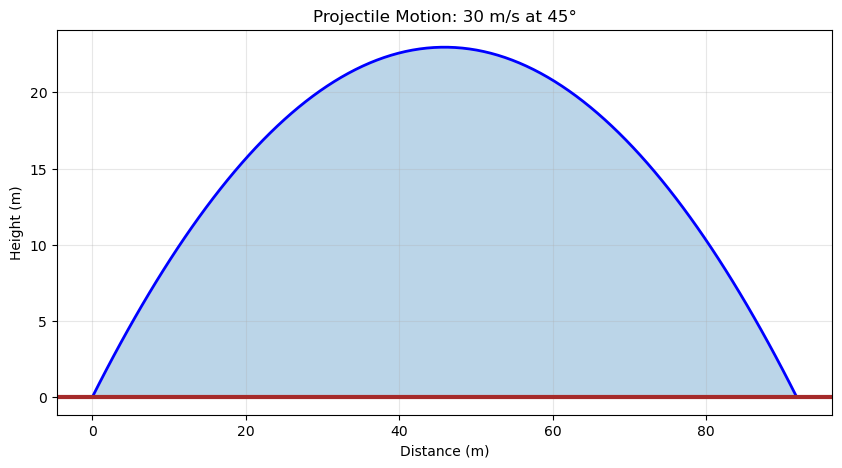

Time of flight: 4.33 seconds
Maximum range: 91.84 meters
Maximum height: 22.96 meters


In [3]:
# Constants
g = 9.8  # gravity (m/s^2)

def projectile_motion(v0, angle_degrees):
    """
    Calculate the trajectory of a projectile.
    
    Parameters:
        v0: initial velocity (m/s)
        angle_degrees: launch angle (degrees)
    
    Returns:
        x, y: arrays of positions
    """
    # Convert angle to radians
    angle = np.radians(angle_degrees)
    
    # Initial velocity components
    vx = v0 * np.cos(angle)
    vy = v0 * np.sin(angle)
    
    # Time of flight (when y = 0 again)
    t_flight = 2 * vy / g
    
    # Time array
    t = np.linspace(0, t_flight, 100)
    
    # Position equations
    x = vx * t
    y = vy * t - 0.5 * g * t**2
    
    return x, y, t_flight

# Launch a ball at 30 m/s at 45 degrees
x, y, t_flight = projectile_motion(30, 45)

plt.figure(figsize=(10, 5))
plt.plot(x, y, 'b-', linewidth=2)
plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Projectile Motion: 30 m/s at 45°')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='brown', linewidth=3)  # Ground
plt.fill_between(x, 0, y, alpha=0.3)
plt.show()

print(f"Time of flight: {t_flight:.2f} seconds")
print(f"Maximum range: {x[-1]:.2f} meters")
print(f"Maximum height: {max(y):.2f} meters")


### 🎯 Exercise: Compare Different Launch Angles

Which angle gives the maximum range?


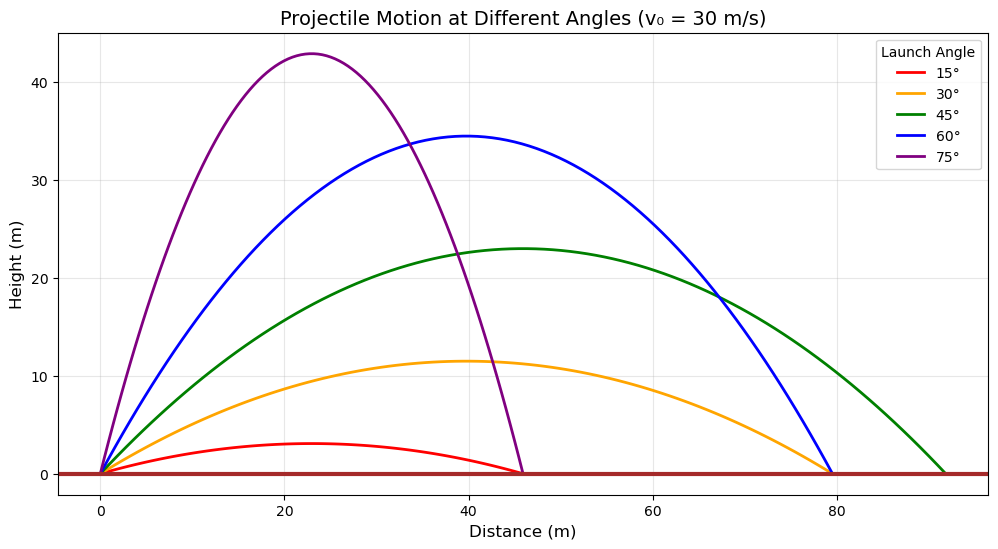


🎯 45° gives the maximum range (in a vacuum with flat ground)!


In [4]:
plt.figure(figsize=(12, 6))

angles = [15, 30, 45, 60, 75]
colors = ['red', 'orange', 'green', 'blue', 'purple']

for angle, color in zip(angles, colors):
    x, y, _ = projectile_motion(30, angle)
    plt.plot(x, y, color=color, linewidth=2, label=f'{angle}°')

plt.xlabel('Distance (m)', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.title('Projectile Motion at Different Angles (v₀ = 30 m/s)', fontsize=14)
plt.legend(title='Launch Angle')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='brown', linewidth=3)
plt.show()

print("\n🎯 45° gives the maximum range (in a vacuum with flat ground)!")


---
## Part 2: Bouncing Ball 🏀

What happens when a ball bounces? Each bounce loses some energy!


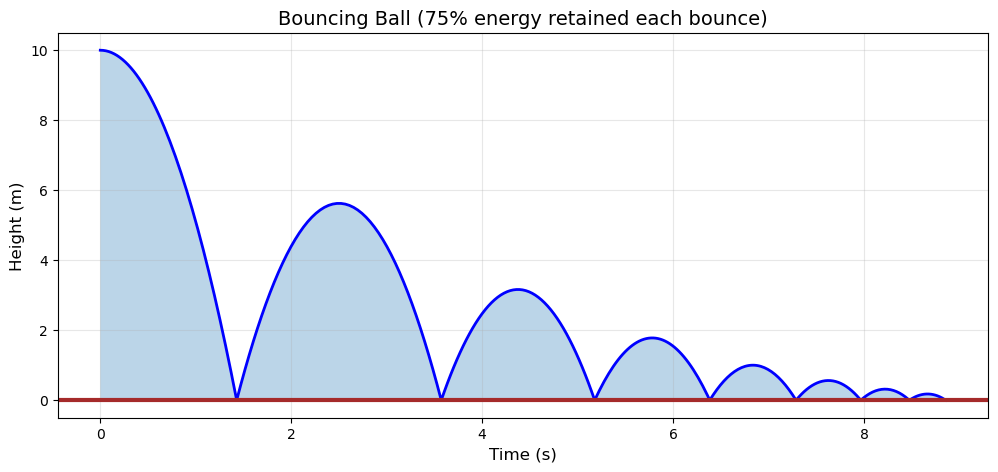

In [5]:
def simulate_bouncing_ball(initial_height, coefficient_of_restitution=0.8, num_bounces=8):
    """
    Simulate a bouncing ball.
    
    coefficient_of_restitution: how much velocity is kept after bounce (0-1)
    """
    g = 9.8
    
    all_t = []
    all_y = []
    
    current_time = 0
    current_velocity = 0
    current_height = initial_height
    
    for bounce in range(num_bounces):
        # Time to hit ground from current height with current velocity
        # Using: y = h + v*t - 0.5*g*t^2 = 0
        a = -0.5 * g
        b = current_velocity
        c = current_height
        
        discriminant = b**2 - 4*a*c
        if discriminant < 0:
            break
            
        t_impact = (-b - np.sqrt(discriminant)) / (2*a)
        if t_impact < 0:
            t_impact = (-b + np.sqrt(discriminant)) / (2*a)
        
        # Generate trajectory for this bounce
        t_segment = np.linspace(0, t_impact, 50)
        y_segment = current_height + current_velocity * t_segment - 0.5 * g * t_segment**2
        
        all_t.extend(current_time + t_segment)
        all_y.extend(y_segment)
        
        # Update for next bounce
        current_time += t_impact
        impact_velocity = current_velocity - g * t_impact
        current_velocity = -impact_velocity * coefficient_of_restitution
        current_height = 0
    
    return np.array(all_t), np.array(all_y)

# Simulate the bouncing ball
t, y = simulate_bouncing_ball(10, coefficient_of_restitution=0.75)

plt.figure(figsize=(12, 5))
plt.plot(t, y, 'b-', linewidth=2)
plt.fill_between(t, 0, y, alpha=0.3)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.title('Bouncing Ball (75% energy retained each bounce)', fontsize=14)
plt.axhline(y=0, color='brown', linewidth=3)
plt.grid(True, alpha=0.3)
plt.show()


### Compare Different Bounce Coefficients


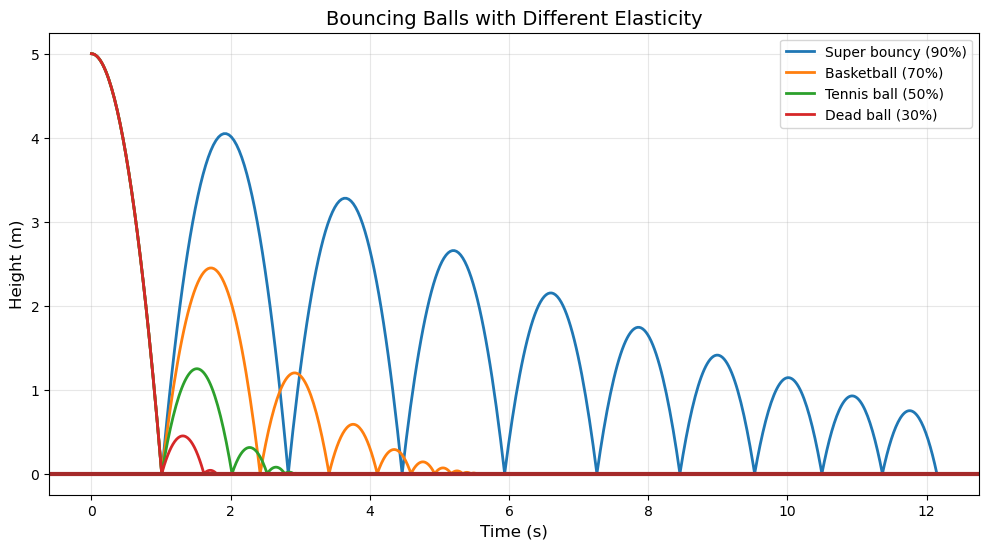

In [6]:
plt.figure(figsize=(12, 6))

coefficients = [0.9, 0.7, 0.5, 0.3]
labels = ['Super bouncy (90%)', 'Basketball (70%)', 'Tennis ball (50%)', 'Dead ball (30%)']

for coef, label in zip(coefficients, labels):
    t, y = simulate_bouncing_ball(5, coefficient_of_restitution=coef, num_bounces=10)
    plt.plot(t, y, linewidth=2, label=label)

plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Height (m)', fontsize=12)
plt.title('Bouncing Balls with Different Elasticity', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='brown', linewidth=3)
plt.show()


---
## Part 3: Simple Pendulum 🕰️

A pendulum swings back and forth. The motion is governed by:

**d²θ/dt² = -(g/L) × sin(θ)**

Where:
- θ = angle from vertical
- L = length of pendulum
- g = gravity

We'll use SciPy to solve this differential equation!


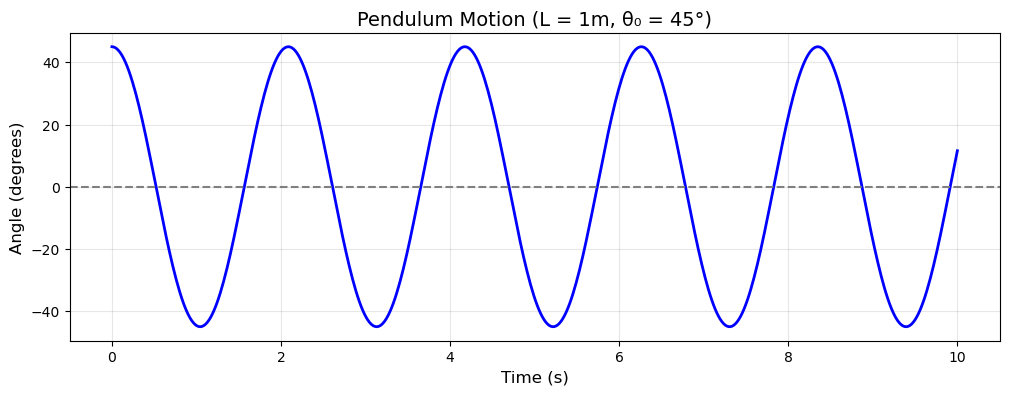

Theoretical period (small angle): 2.007 seconds


In [7]:
from scipy.integrate import odeint

def pendulum_derivatives(state, t, L, g):
    """
    Returns derivatives for the pendulum system.
    state = [theta, omega] where omega = d(theta)/dt
    """
    theta, omega = state
    dtheta_dt = omega
    domega_dt = -(g/L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

# Parameters
L = 1.0  # length (m)
g = 9.8  # gravity (m/s^2)

# Initial conditions: start at 45 degrees, no initial velocity
theta0 = np.radians(45)  # initial angle
omega0 = 0  # initial angular velocity

# Time array
t = np.linspace(0, 10, 500)

# Solve the differential equation
solution = odeint(pendulum_derivatives, [theta0, omega0], t, args=(L, g))
theta = solution[:, 0]

# Plot the angle over time
plt.figure(figsize=(12, 4))
plt.plot(t, np.degrees(theta), 'b-', linewidth=2)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Angle (degrees)', fontsize=12)
plt.title('Pendulum Motion (L = 1m, θ₀ = 45°)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='gray', linestyle='--')
plt.show()

# Calculate period
theoretical_period = 2 * np.pi * np.sqrt(L / g)
print(f"Theoretical period (small angle): {theoretical_period:.3f} seconds")


### Visualize Pendulum Motion


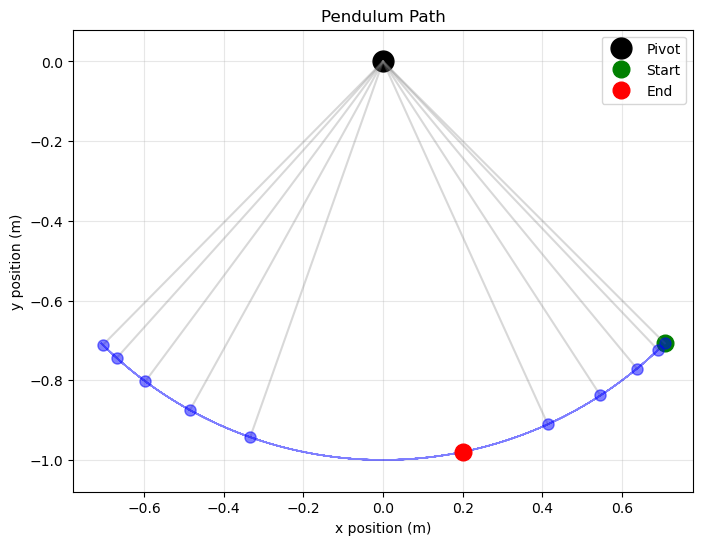

In [8]:
# Convert to x, y coordinates for visualization
x_pend = L * np.sin(theta)
y_pend = -L * np.cos(theta)

# Plot the path the pendulum traces
plt.figure(figsize=(8, 6))
plt.plot(x_pend, y_pend, 'b-', alpha=0.5, linewidth=1)
plt.plot(0, 0, 'ko', markersize=15, label='Pivot')  # Pivot point
plt.plot(x_pend[0], y_pend[0], 'go', markersize=12, label='Start')
plt.plot(x_pend[-1], y_pend[-1], 'ro', markersize=12, label='End')

# Draw some intermediate positions
for i in range(0, len(x_pend), 50):
    plt.plot([0, x_pend[i]], [0, y_pend[i]], 'gray', alpha=0.3)
    plt.plot(x_pend[i], y_pend[i], 'bo', markersize=8, alpha=0.5)

plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Pendulum Path')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


---
## Part 4: Gravity Simulation 🌍🌙

Let's simulate orbital motion using Newton's Law of Gravitation:

**F = G × (m₁ × m₂) / r²**


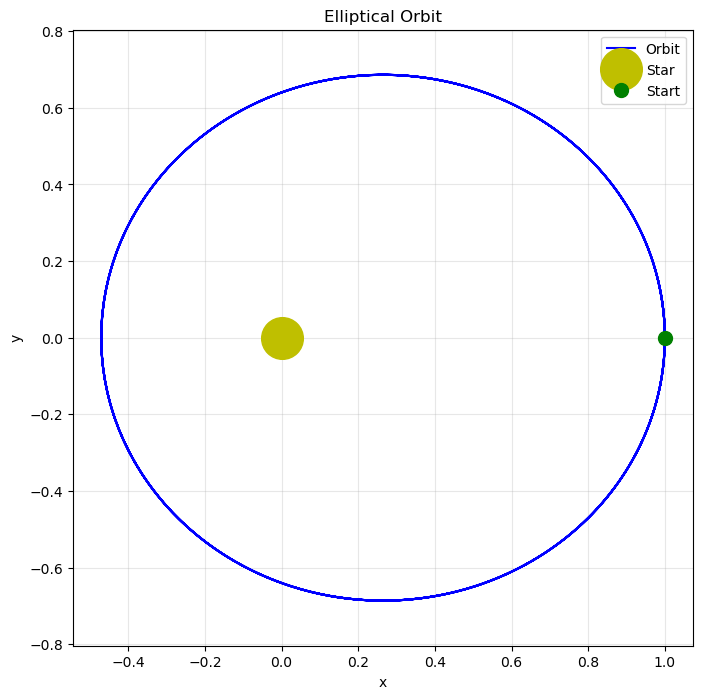

In [9]:
def orbital_derivatives(state, t, M):
    """
    Derivatives for orbital motion.
    state = [x, y, vx, vy]
    M = mass of central body (in units where G*M = 1)
    """
    x, y, vx, vy = state
    r = np.sqrt(x**2 + y**2)
    
    # Acceleration (F = ma, and F = GMm/r^2)
    ax = -M * x / r**3
    ay = -M * y / r**3
    
    return [vx, vy, ax, ay]

# Parameters (normalized units)
M = 1  # Central mass

# Initial conditions for an elliptical orbit
x0, y0 = 1.0, 0  # Start at distance 1
vx0, vy0 = 0, 0.8  # Initial velocity (slightly less than circular orbit)

# Time array
t = np.linspace(0, 20, 1000)

# Solve
orbit = odeint(orbital_derivatives, [x0, y0, vx0, vy0], t, args=(M,))
x_orbit = orbit[:, 0]
y_orbit = orbit[:, 1]

# Plot
plt.figure(figsize=(8, 8))
plt.plot(x_orbit, y_orbit, 'b-', linewidth=1.5, label='Orbit')
plt.plot(0, 0, 'yo', markersize=30, label='Star')  # Central body
plt.plot(x0, y0, 'go', markersize=10, label='Start')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Elliptical Orbit')
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


### Different Initial Velocities = Different Orbits


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


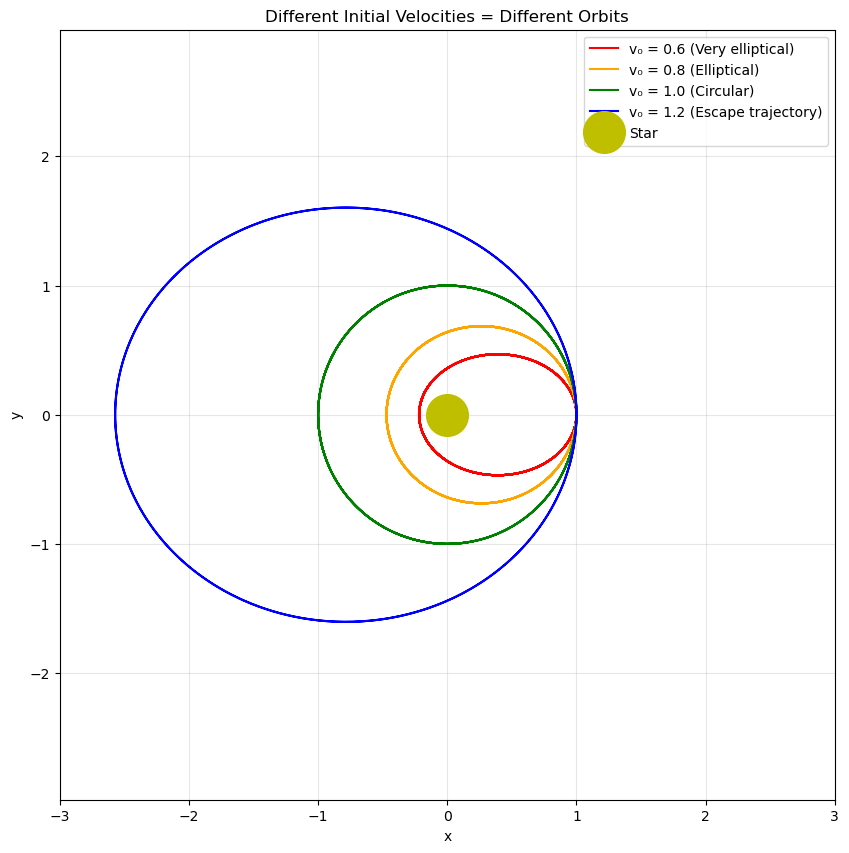

In [10]:
plt.figure(figsize=(10, 10))

velocities = [0.6, 0.8, 1.0, 1.2]
labels = ['Very elliptical', 'Elliptical', 'Circular', 'Escape trajectory']
colors = ['red', 'orange', 'green', 'blue']

for v, label, color in zip(velocities, labels, colors):
    t = np.linspace(0, 30, 1000)
    orbit = odeint(orbital_derivatives, [1.0, 0, 0, v], t, args=(1,))
    plt.plot(orbit[:, 0], orbit[:, 1], color=color, linewidth=1.5, label=f'v₀ = {v} ({label})')

plt.plot(0, 0, 'yo', markersize=30, label='Star')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Different Initial Velocities = Different Orbits')
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.grid(True, alpha=0.3)
plt.legend(loc='upper right')
plt.show()


---
## Part 5: Spring Oscillator 🔄

A spring follows Hooke's Law: **F = -kx**


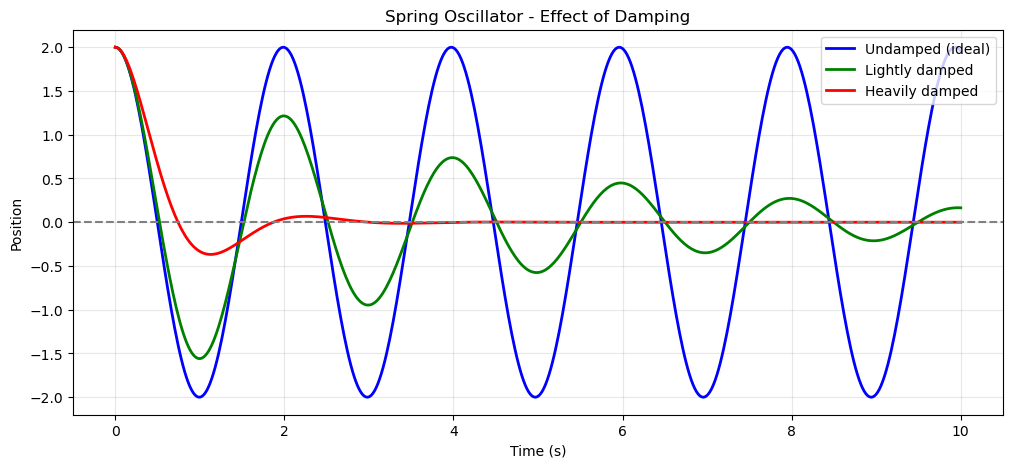

Theoretical period (undamped): 1.987 seconds


In [11]:
def spring_derivatives(state, t, k, m, b):
    """Damped spring oscillator: m*a = -k*x - b*v"""
    x, v = state
    dxdt = v
    dvdt = (-k*x - b*v) / m
    return [dxdt, dvdt]

# Parameters
k = 10  # spring constant
m = 1   # mass

# Compare undamped vs damped
plt.figure(figsize=(12, 5))

# Undamped
t = np.linspace(0, 10, 500)
solution = odeint(spring_derivatives, [2, 0], t, args=(k, m, 0))
plt.plot(t, solution[:, 0], 'b-', linewidth=2, label='Undamped (ideal)')

# Lightly damped
solution = odeint(spring_derivatives, [2, 0], t, args=(k, m, 0.5))
plt.plot(t, solution[:, 0], 'g-', linewidth=2, label='Lightly damped')

# Heavily damped
solution = odeint(spring_derivatives, [2, 0], t, args=(k, m, 3))
plt.plot(t, solution[:, 0], 'r-', linewidth=2, label='Heavily damped')

plt.xlabel('Time (s)')
plt.ylabel('Position')
plt.title('Spring Oscillator - Effect of Damping')
plt.axhline(y=0, color='gray', linestyle='--')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Calculate theoretical period
theoretical_period = 2 * np.pi * np.sqrt(m / k)
print(f"Theoretical period (undamped): {theoretical_period:.3f} seconds")


---
## Part 6: 🎯 Challenge - Design Your Own Simulation!

Ideas to try:

1. **Air Resistance**: Add drag to the projectile motion
   - F_drag = -bv (linear) or F_drag = -cv² (quadratic)

2. **Double Pendulum**: Add a second pendulum to create chaotic motion

3. **Projectile with Wind**: Add a horizontal force

4. **Multiple Orbiting Bodies**: Add a moon orbiting a planet orbiting a star


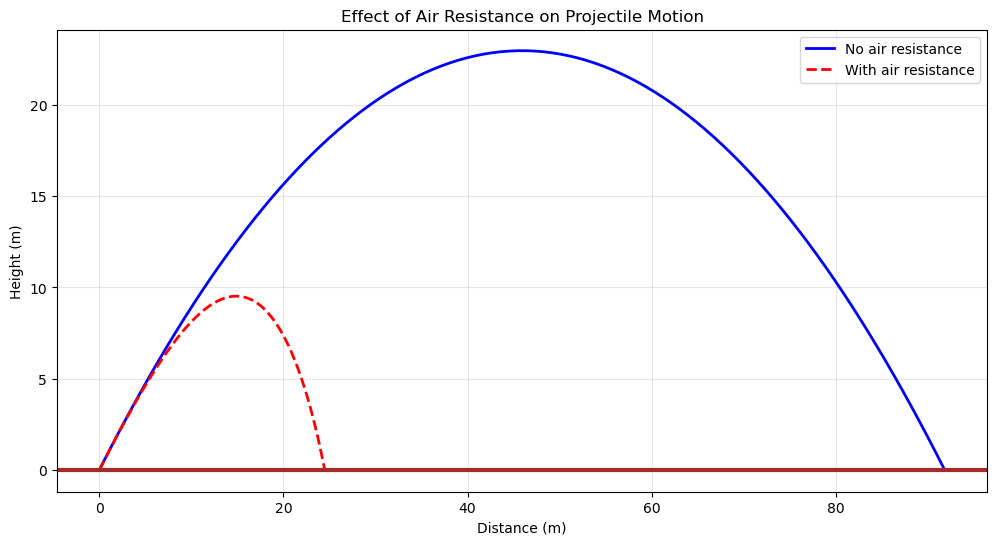

Range without drag: 91.8 m
Range with drag: 24.5 m


In [12]:
# BONUS: Projectile with air resistance!

def projectile_with_drag(v0, angle_degrees, drag_coefficient=0.1):
    """Projectile motion with quadratic air resistance"""
    angle = np.radians(angle_degrees)
    vx = v0 * np.cos(angle)
    vy = v0 * np.sin(angle)
    
    dt = 0.01
    x, y = 0, 0
    xs, ys = [x], [y]
    
    while y >= 0:
        v = np.sqrt(vx**2 + vy**2)
        # Drag force proportional to v^2, opposite to velocity
        ax = -drag_coefficient * v * vx
        ay = -g - drag_coefficient * v * vy
        
        vx += ax * dt
        vy += ay * dt
        x += vx * dt
        y += vy * dt
        
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)

plt.figure(figsize=(12, 6))

# No drag
x, y, _ = projectile_motion(30, 45)
plt.plot(x, y, 'b-', linewidth=2, label='No air resistance')

# With drag
x_drag, y_drag = projectile_with_drag(30, 45, drag_coefficient=0.05)
plt.plot(x_drag, y_drag, 'r--', linewidth=2, label='With air resistance')

plt.xlabel('Distance (m)')
plt.ylabel('Height (m)')
plt.title('Effect of Air Resistance on Projectile Motion')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='brown', linewidth=3)
plt.show()

print(f"Range without drag: {x[-1]:.1f} m")
print(f"Range with drag: {x_drag[-1]:.1f} m")


---
## 📚 Key Formulas Reference

### Kinematics
- v = v₀ + at
- x = x₀ + v₀t + ½at²
- v² = v₀² + 2a(x - x₀)

### Projectile Motion
- x(t) = v₀cos(θ)t
- y(t) = v₀sin(θ)t - ½gt²
- Range: R = v₀²sin(2θ)/g

### Pendulum (small angle)
- Period: T = 2π√(L/g)

### Spring (Hooke's Law)
- F = -kx
- Period: T = 2π√(m/k)

### Gravity
- F = G(m₁m₂)/r²


---
## 🎉 You've just simulated real physics with Python!

The same techniques are used by scientists and engineers to:
- Predict weather patterns
- Design rockets and spacecraft
- Simulate molecular dynamics
- Create realistic video game physics
